# Combining two Excel sheets of data

## Combining Chronostratigraphic data into hydrocarbon source well data

#### Import modules and Excel file with multiple sheets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# show all columns
pd.options.display.max_columns = None

In [3]:
file = 'BB_20190227_RE_data_chronostrat_combine_test.xlsx'

data = pd.ExcelFile(file)

###### Extract sheets into separate DataFrames

In [4]:
sheets = data.sheet_names

chrono = data.parse(sheets[0])
redata = data.parse(sheets[1])

In [5]:
redata.head(10)

,Well,Depth m RKB,Formation (NPD),Type of measurement,samplith,tmax,s1,s2,s3,toc,HI,pi,company_name
0,6406/2-1,2510.000,SPRINGAR FM,DC,SH/CLYST,356.0,2.20,4.61,2.14,1.15,401,0.32,GEOLABNOR
1,6406/2-1,2520.000,SPRINGAR FM,DC,SH/CLYST,362.0,1.05,3.00,1.74,1.00,300,0.26,GEOLABNOR
2,6406/2-1,2530.000,SPRINGAR FM,DC,SH/CLYST,360.0,1.85,4.23,2.54,1.01,419,0.30,GEOLABNOR
3,6406/2-1,2540.000,SPRINGAR FM,DC,CLYST/SH,360.0,1.34,2.97,1.72,0.80,371,0.31,GEOLABNOR(SAGA)
4,6406/2-1,2540.001,SPRINGAR FM,DC,SH/CLYST,360.0,1.34,2.97,1.72,0.80,371,0.31,GEOLABNOR
5,6406/2-1,2550.001,SPRINGAR FM,DC,SH/CLYST,360.0,2.22,4.06,2.27,1.10,369,0.35,GEOLABNOR
6,6406/2-1,2565.000,SPRINGAR FM,DC,CLYST/SH,350.0,1.03,1.93,1.37,0.50,386,0.35,GEOLABNOR(SAGA)
7,6406/2-1,2575.000,SPRINGAR FM,DC,CLYST/SH,356.0,2.76,4.27,1.89,1.09,392,0.39,GEOLABNOR(SAGA)
8,6406/2-1,2590.000,SPRINGAR FM,DC,CLYST/SH,357.0,1.21,3.50,1.81,0.90,389,0.26,GEOLABNOR(SAGA)
9,6406/2-1,2600.000,SPRINGAR FM,DC,CLYST/SH,355.0,1.67,3.12,1.14,0.98,318,0.35,GEOLABNOR(SAGA)


In [6]:
chrono.iloc[12:25,:]

,Well,Period,Top_depth_m,Base_depth_m,Thickness_m,Top_age_Ma,Bottom_age_Ma
12,6406/2-1,UPPER PLIOCENE,2450,2503,53,1.64,2.52
13,6406/2-1,UPPER CAMPANIAN,2503,2610,107,74.00,78.50
14,6406/2-1,MIDDLE CAMPANIAN,2610,2690,80,77.00,80.00
15,6406/2-1,LOWER CAMPANIAN,2690,2848,158,78.50,86.60
16,6406/2-1,SANTONIAN,2848,3070,222,83.00,86.60
17,6406/2-1,CONIACIAN,3070,3380,310,86.60,88.50
18,6406/2-1,UPPER TURONIAN,3380,3450,70,88.50,89.80
19,6406/2-1,LOWER TURONIAN,3450,3960,510,89.80,92.60
20,6406/2-1,UPPER CENOMANIAN,3960,4005,45,90.40,92.60
21,6406/2-1,MIDDLE CENOMANIAN,4005,4008,3,92.60,94.80


In [7]:
print(chrono.shape)
print(redata.shape)

(105, 7)
(303, 13)


#### Merge two datasets

In [8]:
merge = pd.merge(chrono,redata)

#### Cleanup

In [9]:
merge = merge [ (merge['Depth m RKB'] > merge['Top_depth_m']) & (merge['Depth m RKB'] <= merge['Base_depth_m']) ]

merge.drop(['Top_depth_m', 'Base_depth_m', 'Thickness_m','Top_age_Ma', 'Bottom_age_Ma'], axis=1, inplace=True)

merge.index = pd.RangeIndex(len(merge.index))

In [10]:
merge.sample(10).sort_index()

,Well,Period,Depth m RKB,Formation (NPD),Type of measurement,samplith,tmax,s1,s2,s3,toc,HI,pi,company_name
23,6406/2-1,LOWER CAMPANIAN,2775.0,SHETLAND,DC,CLYST/SH,360.0,2.08,5.01,2.04,1.29,388,0.29,GEOLABNOR(SAGA)
93,6406/2-1,LOWER TURONIAN,3720.0,LANGE UP FM,DC,CLYST/SH,345.0,0.50,0.18,0.24,0.05,360,0.74,GEOLABNOR(SAGA)
99,6406/2-1,LOWER TURONIAN,3820.0,LANGE UP FM,DC,CLYST/SH,344.0,0.51,0.18,0.20,0.27,67,0.74,GEOLABNOR(SAGA)
103,6406/2-1,LOWER TURONIAN,3900.0,LANGE UP FM,DC,CLYST/SH,342.0,0.41,0.14,0.09,0.28,50,0.75,GEOLABNOR(SAGA)
111,6406/2-1,LOWER CENOMANIAN,4020.0,LANGE UP FM,DC,CLYST/SH,346.0,0.46,0.19,0.27,0.27,70,0.71,GEOLABNOR(SAGA)
117,6406/2-1,LOWER CENOMANIAN,4132.0,LANGE UP FM,SWC,SH,NaN,0.33,1.15,NaN,0.82,140,0.22,SAGA(SAGA)
178,6406/2-2,MIDDLE TURONIAN,3453.0,LYSING FM,SWC,CLYST/SST,438.0,4.90,2.10,NaN,1.42,148,0.70,SAGA(SAGA)
188,6406/2-2,CENOMANIAN,3650.0,LANGE UP FM,DC,CLYST/SH,430.0,30.99,3.60,0.48,1.50,240,0.90,GEOLABNOR(SAGA)
200,6406/2-2,CENOMANIAN,3950.0,LANGE UP FM,DC,CLYST/SH,432.0,29.24,3.31,0.92,1.88,176,0.90,GEOLABNOR(SAGA)
286,6406/3-1,ALBIAN,3585.0,LANGE UP FM,DC,SH,477.0,0.17,0.26,0.13,0.76,34,0.40,ROBERTSON(SAGA)


for num in range(len(wells)):
    print('Number of rows of', wells[num],  len(redata[ redata['Well']==wells[num]]))
    
for num in range(len(wells)):
    print('Number of rows of', wells[num],  len(chrono[ chrono['Well']==wells[num]]))
    
for num in range(len(wells)):
    print('Number of rows of', wells[num],  len(merge[ merge['Well']==wells[num]]))

###### Look for missing data in rows and columns

In [11]:
#Show missing entries
def num_missing(x):
  return sum(x.isnull())

In [12]:
#Applying per column:
print ("Missing values per column:")
print (chrono.apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (chrono.apply(num_missing, axis=1).head()) #axis=1 row

#Applying per column:
print ("Missing values per column:")
print (redata.apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (redata.apply(num_missing, axis=1).head()) #axis=1 row

Missing values per column:
Well             0
Period           0
Top_depth_m      0
Base_depth_m     0
Thickness_m      0
Top_age_Ma       0
Bottom_age_Ma    0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64
Missing values per column:
Well                    0
Depth m RKB             0
Formation (NPD)         0
Type of measurement     0
samplith                0
tmax                    7
s1                      0
s2                      0
s3                     31
toc                     0
HI                      0
pi                      0
company_name            0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


#### The redata has null values in the 'tmax' and 's3' columns

#### Edit missing data

In [13]:
#null_data = df[df.isnull().any(axis=1)]

In [14]:
null_data = merge[np.logical_or.reduce(merge.isnull(), axis=1)]
null_data.head(10)

,Well,Period,Depth m RKB,Formation (NPD),Type of measurement,samplith,tmax,s1,s2,s3,toc,HI,pi,company_name
75,6406/2-1,UPPER TURONIAN,3417.0,LYSING FM,SWC,SH,436.0,0.29,1.18,NaN,1.06,111,0.20,SAGA(SAGA)
76,6406/2-1,UPPER TURONIAN,3420.0,LYSING FM,SWC,SH/SST,437.0,0.97,3.74,NaN,1.46,256,0.21,SAGA(SAGA)
81,6406/2-1,LOWER TURONIAN,3500.0,LYSING FM,SWC,SH,434.0,0.39,1.79,NaN,1.13,158,0.18,SAGA(SAGA)
82,6406/2-1,LOWER TURONIAN,3508.0,LYSING FM,SWC,SLT,438.0,0.26,1.32,NaN,0.91,145,0.16,SAGA(SAGA)
83,6406/2-1,LOWER TURONIAN,3514.0,LYSING FM,SWC,SH,437.0,0.32,1.19,NaN,0.90,132,0.21,SAGA(SAGA)
91,6406/2-1,LOWER TURONIAN,3708.0,LANGE UP FM,SWC,SH,440.0,0.30,1.23,NaN,0.85,145,0.20,SAGA(SAGA)
94,6406/2-1,LOWER TURONIAN,3721.0,LANGE UP FM,SWC,SH,442.0,0.17,1.19,NaN,1.06,112,0.13,SAGA(SAGA)
100,6406/2-1,LOWER TURONIAN,3840.0,LANGE UP FM,DC,CLYST/SH,NaN,0.26,0.07,0.09,0.17,41,0.79,GEOLABNOR(SAGA)
104,6406/2-1,LOWER TURONIAN,3920.0,LANGE UP FM,DC,CLYST/SH,NaN,0.32,0.05,0.05,0.18,28,0.86,GEOLABNOR(SAGA)
105,6406/2-1,LOWER TURONIAN,3940.0,LANGE UP FM,DC,CLYST/SH,NaN,0.42,0.13,0.15,0.14,93,0.76,GEOLABNOR(SAGA)


In [15]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Well                   303 non-null object
Period                 303 non-null object
Depth m RKB            303 non-null float64
Formation (NPD)        303 non-null object
Type of measurement    303 non-null object
samplith               303 non-null object
tmax                   296 non-null float64
s1                     303 non-null float64
s2                     303 non-null float64
s3                     272 non-null float64
toc                    303 non-null float64
HI                     303 non-null int64
pi                     303 non-null float64
company_name           303 non-null object
dtypes: float64(7), int64(1), object(6)
memory usage: 33.2+ KB


In [16]:
tops=('Springar Fm', 'Nise Fm', 'Kvitnos Fm', 'Lysing Fm', 'Lange Fm', 'Spekk Fm', ',Melke Fm', 'Garn Fm')
tops_depths=(2503, 2672, 2848, 3415, 3442, 4371, 4381, 4417)

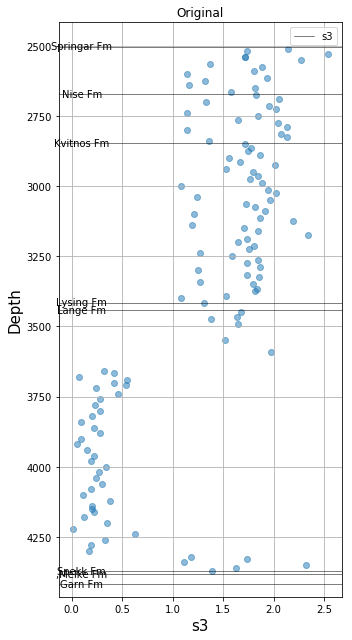

In [17]:
fig, ax = plt.subplots(figsize=(5,9))

ax.scatter(merge[ merge['Well'] == '6406/2-1']['s3'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)

for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Original')
ax.legend(['s3'])
ax.grid(True)
fig.tight_layout()

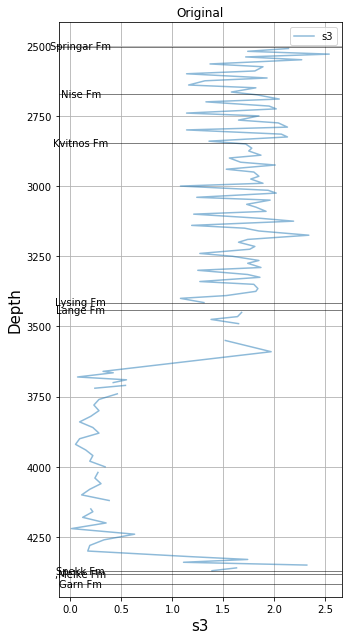

In [18]:
fig, ax = plt.subplots(figsize=(5,9))

ax.plot(merge[ merge['Well'] == '6406/2-1']['s3'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)

for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Original')
ax.legend(['s3'])
ax.grid(True)
fig.tight_layout()

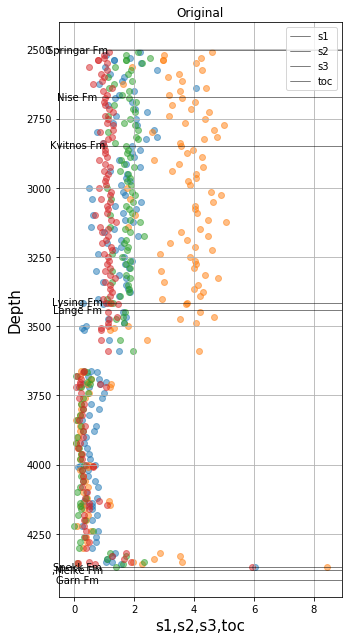

In [19]:
#merge[ merge['Well'] == '6406/2-1']['s3'].plot()

fig, ax = plt.subplots(figsize=(5,9))

ax.scatter(merge[ merge['Well'] == '6406/2-1']['s1'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)
ax.scatter(merge[ merge['Well'] == '6406/2-1']['s2'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)
ax.scatter(merge[ merge['Well'] == '6406/2-1']['s3'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)
ax.scatter(merge[ merge['Well'] == '6406/2-1']['toc'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)


for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')


ax.invert_yaxis()
ax.set_xlabel('s1,s2,s3,toc', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Original')
ax.legend(['s1','s2','s3','toc'])
ax.grid(True)
fig.tight_layout()

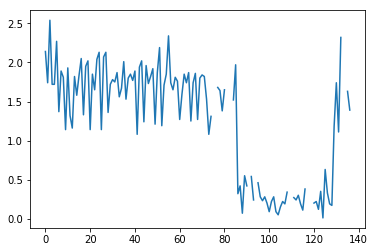

In [20]:
merge[ merge['Well'] == '6406/2-1']['s3'].plot()

In [21]:
merge['s3'] = merge.groupby(['Well','Period'])['s3'].transform(lambda x: x.fillna(x.median()))
merge['tmax'] = merge.groupby(['Well','Period'])['tmax'].transform(lambda x: x.fillna(x.median()))

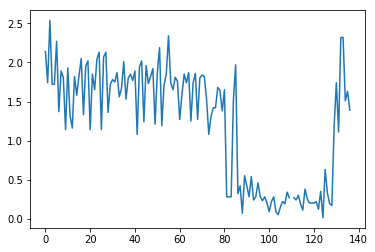

In [22]:
merge[ merge['Well'] == '6406/2-1']['s3'].plot()

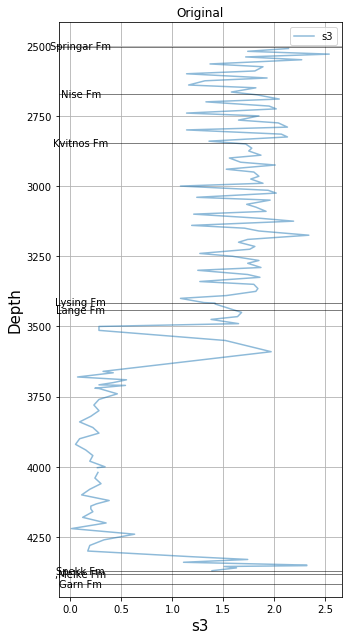

In [23]:
fig, ax = plt.subplots(figsize=(5,9))

ax.plot(merge[ merge['Well'] == '6406/2-1']['s3'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)

for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Original')
ax.legend(['s3'])
ax.grid(True)
fig.tight_layout()

In [24]:
null_data = merge[np.logical_or.reduce(merge.isnull(), axis=1)]
null_data

,Well,Period,Depth m RKB,Formation (NPD),Type of measurement,samplith,tmax,s1,s2,s3,toc,HI,pi,company_name
110,6406/2-1,MIDDLE CENOMANIAN,4008.0,LANGE UP FM,SWC,SH,444.0,0.14,0.45,NaN,0.63,71,0.24,SAGA(SAGA)
216,6406/2-2,LOWER APTIAN,4353.0,LANGE LOW FM,SWC,CLYST,463.0,5.58,5.12,NaN,5.02,102,0.52,SAGA
217,6406/2-2,LOWER APTIAN,4353.9,LANGE LOW FM,SWC,CLYST,463.0,5.58,5.12,NaN,5.02,102,0.52,SAGA(SAGA)
218,6406/2-2,LOWER APTIAN,4354.0,LANGE LOW FM,SWC,CLYST,466.0,4.96,7.73,NaN,8.25,94,0.39,SAGA(SAGA)


In [25]:
#Applying per column:
print ("Missing values per column:")
print (merge.apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (merge.apply(num_missing, axis=1).head()) #axis=1 row

Missing values per column:
Well                   0
Period                 0
Depth m RKB            0
Formation (NPD)        0
Type of measurement    0
samplith               0
tmax                   0
s1                     0
s2                     0
s3                     4
toc                    0
HI                     0
pi                     0
company_name           0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [26]:
merge.dropna(inplace=True)

In [27]:
print(chrono.shape)
print(redata.shape)

(105, 7)
(303, 13)


In [28]:
merge.describe()

,Depth m RKB,tmax,s1,s2,s3,toc,HI,pi
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,3341.921411,398.078595,6.485418,2.213913,0.931405,1.067224,190.397993,0.436756
std,516.730020,40.460682,12.528833,1.846341,0.631410,0.647244,124.004839,0.277041
min,2420.000000,305.000000,0.030000,0.050000,0.010000,0.050000,21.000000,0.070000
25%,2912.500000,357.000000,0.245000,0.430000,0.455000,0.770000,73.000000,0.220000
50%,3340.000000,425.000000,0.970000,1.930000,0.780000,0.950000,172.000000,0.340000
75%,3680.000000,432.000000,2.105000,3.780000,1.405000,1.220000,308.000000,0.680000
max,4370.000000,485.000000,59.160000,10.980000,2.870000,6.500000,419.000000,0.920000


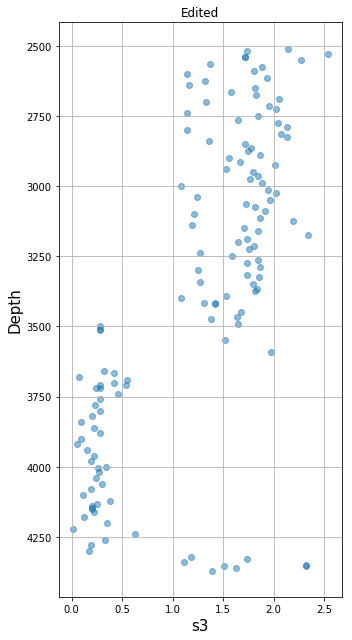

In [29]:
#merge[ merge['Well'] == '6406/2-1']['s3'].plot()

fig, ax = plt.subplots(figsize=(5,9))
ax.scatter(merge[ merge['Well'] == '6406/2-1']['s3'], merge[ merge['Well'] == '6406/2-1']['Depth m RKB'], alpha=0.5)

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Edited')

ax.grid(True)
fig.tight_layout()

# BACKUP

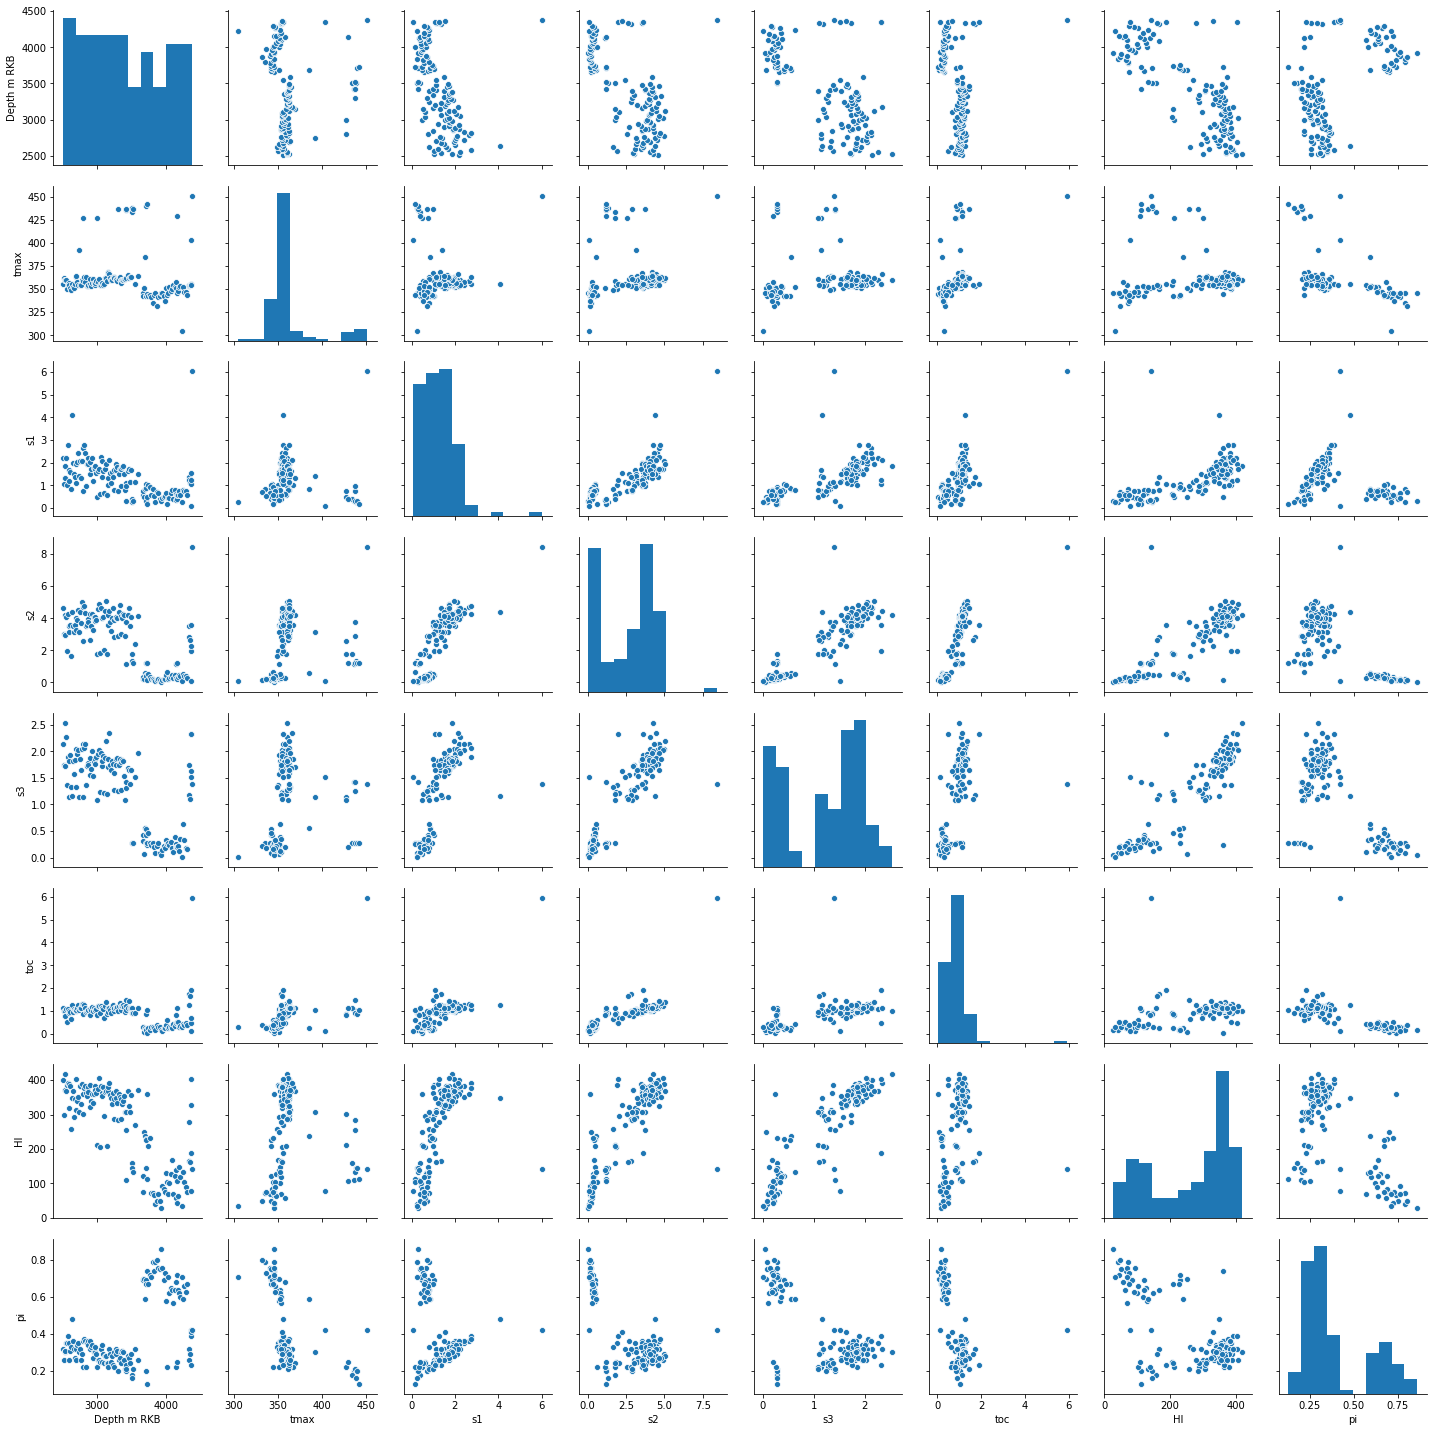

In [30]:
sns.pairplot(merge[ merge['Well'] == '6406/2-1'])

In [31]:
Well21 = merge[ merge['Well'] == '6406/2-1']

In [32]:
def re_logs(top_depth, bottom_depth):
    
    #merge = merge[ merge['Well'] == '6406/2-1']
    logs = Well21[ (Well21['Depth m RKB'] >= top_depth) & (Well21['Depth m RKB'] <= bottom_depth) ]
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(15,15), sharey=True)
    fig.suptitle("6406/2-1", fontsize=22)
    fig.subplots_adjust(top=0.9,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        #for (i,j) in zip(tops_depths,tops):
        #    if ((i>=top_depth) and (i<=bottom_depth)):
        #        axes.axhline(y=i, linewidth=0.5, color='black')
        #        axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
# 1st track: DT
    
    ax01=ax[0].twiny()
    ax01.grid(True)
    ax01.set_xlim(Well21['tmax'].min(), Well21['tmax'].max())
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel('tmax')
    ax01.scatter(logs['tmax'], logs['Depth m RKB'], label='tmax', color='blue')
    ax01.set_xlabel('tmax', color='blue')    
    ax01.tick_params(axis='x', colors='blue')

# 2nd track: Velocity from sonic
    
    ax02=ax[1].twiny()
    ax02.grid(True)
    ax02.set_xlim(Well21['s1'].min(), Well21['s1'].max())
    ax02.spines['top'].set_position(('outward',0))
    ax02.set_xlabel('s1')
    ax02.scatter(logs['s1'], logs['Depth m RKB'], label='s1', color='red')
    ax02.set_xlabel('s1', color='red')    
    ax02.tick_params(axis='x', colors='red')
    
# 3rd track: Checkshot
    
    ax03=ax[2].twiny()
    ax03.grid(True)
    ax03.set_xlim(Well21['s2'].min(), Well21['s2'].max())
    ax03.spines['top'].set_position(('outward',0))
    ax03.set_xlabel('s2')
    ax03.scatter(logs['s2'], logs['Depth m RKB'], label='s2', color='green', marker='o')
    ax03.set_xlabel('s2', color='green')    
    ax03.tick_params(axis='x', colors='green')
    
# 4th track: TDR calibrated synthetic interval velocity
    
    ax04=ax[3].twiny()
    ax04.grid(True)
    ax04.set_xlim(Well21['s3'].min(), Well21['s3'].max())
    ax04.spines['top'].set_position(('outward',0))
    ax04.set_xlabel('s3')
    ax04.scatter(logs['s3'], logs['Depth m RKB'], label='s3', color='orange')
    ax04.set_xlabel('s3', color='orange')    
    ax04.tick_params(axis='x', colors='orange')
    
# 5th track: TDR calibrated synthetic interval velocity
    
    ax05=ax[4].twiny()
    ax05.grid(True)
    ax05.set_xlim(Well21['toc'].min(), Well21['toc'].max())
    ax05.spines['top'].set_position(('outward',0))
    ax05.set_xlabel('toc')
    ax05.scatter(logs['toc'], logs['Depth m RKB'], label='toc', color='black')
    ax05.set_xlabel('toc', color='black')    
    ax05.tick_params(axis='x', colors='black')

# 6th track: TDR calibrated synthetic interval velocity
    
    ax06=ax[5].twiny()
    ax06.grid(True)
    ax06.set_xlim(Well21['HI'].min(), Well21['HI'].max())
    ax06.spines['top'].set_position(('outward',0))
    ax06.set_xlabel('HI')
    ax06.scatter(logs['HI'], logs['Depth m RKB'], label='HI', color='purple')
    ax06.set_xlabel('HI', color='purple')    
    ax06.tick_params(axis='x', colors='purple')
    
# 7th track: TDR calibrated synthetic interval velocity
    
    ax07=ax[6].twiny()
    ax07.grid(True)
    ax07.set_xlim(Well21['pi'].min(), Well21['pi'].max())
    ax07.spines['top'].set_position(('outward',0))
    ax07.set_xlabel('pi')
    ax07.scatter(logs['pi'], logs['Depth m RKB'], label='pi', color='brown')
    ax07.set_xlabel('pi', color='brown')    
    ax07.tick_params(axis='x', colors='brown')

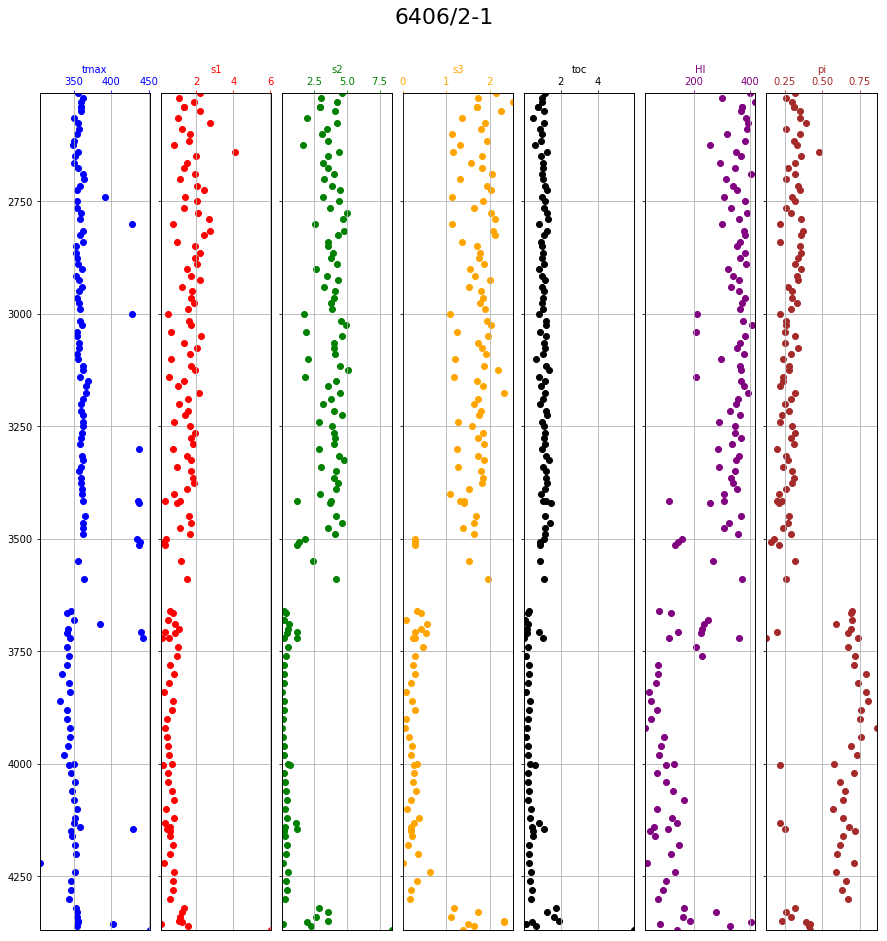

In [33]:
re_logs(Well21['Depth m RKB'].min(), Well21['Depth m RKB'].max())

In [34]:
merge.groupby(['Well','Period'])['tmax','s1','s2','s3','toc','HI','pi'].mean()

tmax         s1        s2        s3  \
Well     Period                                                           
6406/2-1 APTIAN               356.000000   1.155000  2.780000  2.320000   
         CONIACIAN            364.040000   1.472400  3.826000  1.718400   
         HAUTERIVIAN          403.000000   2.550000  3.606667  1.510000   
         LOWER CAMPANIAN      367.333333   1.829167  3.980000  1.734167   
         LOWER CENOMANIAN     350.428571   0.554286  0.454286  0.249286   
         LOWER TURONIAN       363.913793   0.716897  1.052414  0.505862   
         MIDDLE ALBIAN        354.000000   1.240000  3.020000  1.343333   
         MIDDLE CAMPANIAN     354.000000   1.900000  3.422857  1.670000   
         SANTONIAN            360.555556   1.646667  3.711111  1.731667   
         UPPER ALBIAN         352.818182   0.602727  0.421818  0.238182   
         UPPER CAMPANIAN      357.600000   1.667000  3.466000  1.834000   
         UPPER CENOMANIAN     344.000000   0.460000  0.440000  0.265000   
         UPPER TURONIAN       387.000000   1.048333  3.333333  1.406667   
6406/2-2 CENOMANIAN           432.166667  25.043333  3.183333  0.760000   
         CONIACIAN            429.727273  24.396364  3.530000  0.581818   
         LOWER ALBIAN         427.000000  33.565000  3.155000  0.740000   
         LOWER CAMPANIAN      395.363636  12.453636  2.890909  1.143636   
         LOWER SANTONIAN      428.500000  15.956667  2.385000  0.725000   
         MIDDLE CENOMANIAN    424.125000  27.957500  3.168750  0.787500   
         MIDDLE TURONIAN      432.333333  26.862667  3.974000  0.600000   
         UPPER ALBIAN         434.000000  32.715000  4.260000  0.910000   
         UPPER CAMPANIAN      357.833333   1.756667  2.216667  1.535000   
         UPPER HAUTERIVIAN    436.000000  35.140000  3.160000  0.780000   
6406/3-1 ALBIAN               439.184211   0.160526  0.321842  0.318421   
         BARREMIAN            460.750000   0.602500  2.910000  0.447500   
         DANIAN               423.000000   0.030000  0.270000  1.180000   
         LOWER CAMPANIAN      427.111111   0.066667  0.681111  0.950000   
         LOWER MAASTRICHTIAN  423.000000   0.040000  0.440000  1.370000   
         UPPER CRETACEOUS     430.566667   0.074333  0.627667  0.715333   

                                   toc          HI        pi  
Well     Period                                               
6406/2-1 APTIAN               1.200000  295.000000  0.310000  
         CONIACIAN            1.117600  339.640000  0.272800  
         HAUTERIVIAN          2.256667  183.333333  0.416667  
         LOWER CAMPANIAN      1.130000  349.916667  0.304167  
         LOWER CENOMANIAN     0.388571  113.857143  0.578571  
         LOWER TURONIAN       0.516207  168.482759  0.554483  
         MIDDLE ALBIAN        1.550000  201.666667  0.290000  
         MIDDLE CAMPANIAN     0.987143  343.142857  0.341429  
         SANTONIAN            1.053889  347.888889  0.302778  
         UPPER ALBIAN         0.474545   88.454545  0.615455  
         UPPER CAMPANIAN      0.933000  371.600000  0.320000  
         UPPER CENOMANIAN     0.416667  102.666667  0.510000  
         UPPER TURONIAN       1.171667  283.666667  0.231667  
6406/2-2 CENOMANIAN           1.603889  190.000000  0.833333  
         CONIACIAN            1.704545  207.363636  0.810000  
         LOWER ALBIAN         2.130000  147.500000  0.915000  
         LOWER CAMPANIAN      1.242727  230.000000  0.563636  
         LOWER SANTONIAN      1.398333  165.333333  0.761667  
         MIDDLE CENOMANIAN    1.785000  162.000000  0.826250  
         MIDDLE TURONIAN      1.605333  238.800000  0.767333  
         UPPER ALBIAN         2.245000  191.000000  0.885000  
         UPPER CAMPANIAN      0.785000  284.500000  0.346667  
         UPPER HAUTERIVIAN    1.750000  181.000000  0.920000  
6406/3-1 ALBIAN               0.774474   41.526316  0.305000  
         BARREMIAN            2.197500   64.000000  0.345000  
         

In [35]:
merge.groupby(['Period','Well'])['tmax','s1','s2','s3','toc','HI','pi'].mean()

tmax         s1        s2        s3  \
Period              Well                                                  
ALBIAN              6406/3-1  439.184211   0.160526  0.321842  0.318421   
APTIAN              6406/2-1  356.000000   1.155000  2.780000  2.320000   
BARREMIAN           6406/3-1  460.750000   0.602500  2.910000  0.447500   
CENOMANIAN          6406/2-2  432.166667  25.043333  3.183333  0.760000   
CONIACIAN           6406/2-1  364.040000   1.472400  3.826000  1.718400   
                    6406/2-2  429.727273  24.396364  3.530000  0.581818   
DANIAN              6406/3-1  423.000000   0.030000  0.270000  1.180000   
HAUTERIVIAN         6406/2-1  403.000000   2.550000  3.606667  1.510000   
LOWER ALBIAN        6406/2-2  427.000000  33.565000  3.155000  0.740000   
LOWER CAMPANIAN     6406/2-1  367.333333   1.829167  3.980000  1.734167   
                    6406/2-2  395.363636  12.453636  2.890909  1.143636   
                    6406/3-1  427.111111   0.066667  0.681111  0.950000   
LOWER CENOMANIAN    6406/2-1  350.428571   0.554286  0.454286  0.249286   
LOWER MAASTRICHTIAN 6406/3-1  423.000000   0.040000  0.440000  1.370000   
LOWER SANTONIAN     6406/2-2  428.500000  15.956667  2.385000  0.725000   
LOWER TURONIAN      6406/2-1  363.913793   0.716897  1.052414  0.505862   
MIDDLE ALBIAN       6406/2-1  354.000000   1.240000  3.020000  1.343333   
MIDDLE CAMPANIAN    6406/2-1  354.000000   1.900000  3.422857  1.670000   
MIDDLE CENOMANIAN   6406/2-2  424.125000  27.957500  3.168750  0.787500   
MIDDLE TURONIAN     6406/2-2  432.333333  26.862667  3.974000  0.600000   
SANTONIAN           6406/2-1  360.555556   1.646667  3.711111  1.731667   
UPPER ALBIAN        6406/2-1  352.818182   0.602727  0.421818  0.238182   
                    6406/2-2  434.000000  32.715000  4.260000  0.910000   
UPPER CAMPANIAN     6406/2-1  357.600000   1.667000  3.466000  1.834000   
                    6406/2-2  357.833333   1.756667  2.216667  1.535000   
UPPER CENOMANIAN    6406/2-1  344.000000   0.460000  0.440000  0.265000   
UPPER CRETACEOUS    6406/3-1  430.566667   0.074333  0.627667  0.715333   
UPPER HAUTERIVIAN   6406/2-2  436.000000  35.140000  3.160000  0.780000   
UPPER TURONIAN      6406/2-1  387.000000   1.048333  3.333333  1.406667   

                                   toc          HI        pi  
Period              Well                                      
ALBIAN              6406/3-1  0.774474   41.526316  0.305000  
APTIAN              6406/2-1  1.200000  295.000000  0.310000  
BARREMIAN           6406/3-1  2.197500   64.000000  0.345000  
CENOMANIAN          6406/2-2  1.603889  190.000000  0.833333  
CONIACIAN           6406/2-1  1.117600  339.640000  0.272800  
                    6406/2-2  1.704545  207.363636  0.810000  
DANIAN              6406/3-1  0.850000   32.000000  0.100000  
HAUTERIVIAN         6406/2-1  2.256667  183.333333  0.416667  
LOWER ALBIAN        6406/2-2  2.130000  147.500000  0.915000  
LOWER CAMPANIAN     6406/2-1  1.130000  349.916667  0.304167  
                    6406/2-2  1.242727  230.000000  0.563636  
                    6406/3-1  0.847778   78.666667  0.091111  
LOWER CENOMANIAN    6406/2-1  0.388571  113.857143  0.578571  
LOWER MAASTRICHTIAN 6406/3-1  1.100000   40.000000  0.080000  
LOWER SANTONIAN     6406/2-2  1.398333  165.333333  0.761667  
LOWER TURONIAN      6406/2-1  0.516207  168.482759  0.554483  
MIDDLE ALBIAN       6406/2-1  1.550000  201.666667  0.290000  
MIDDLE CAMPANIAN    6406/2-1  0.987143  343.142857  0.341429  
MIDDLE CENOMANIAN   6406/2-2  1.785000  162.000000  0.826250  
MIDDLE TURONIAN     6406/2-2  1.605333  238.800000  0.767333  
SANTONIAN           6406/2-1  1.053889  347.888889  0.302778  
UPPER ALBIAN        6406/2-1  0.474545   88.454545  0.615455  
                    6406/2-2  2.245000  191.000000  0.885000  
UPPER CAMPANIAN     6406/2-1  0.933000  371.600000  0.320000  
                    6406/2-2  0.785000  284.500000  0.346667  
UPPER CEN

C:\Users\aledunba\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


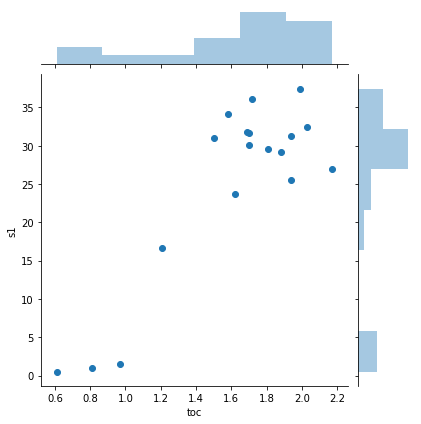

In [36]:
sns.jointplot(merge[ merge['Period'] == 'CENOMANIAN']['toc'], merge [merge['Period'] == 'CENOMANIAN']['s1'] )

C:\Users\aledunba\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


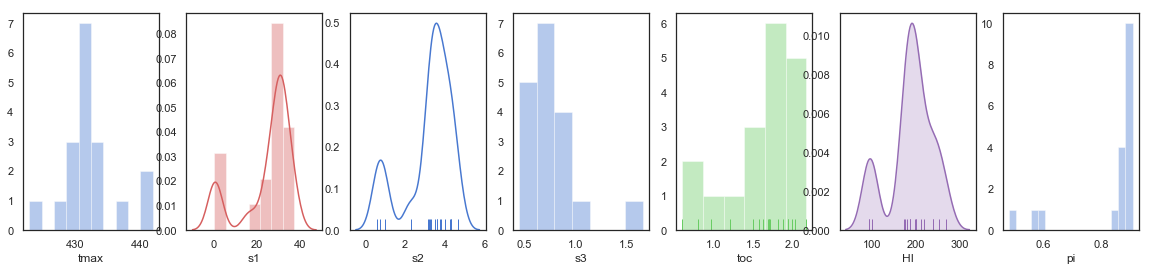

In [37]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 7, figsize=(20, 4))

# Plot a simple histogram with binsize determined automatically
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['tmax'], kde=False, color="b", ax=axes[0])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['s1'], kde=True, color="r", ax=axes[1])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['s2'], hist=False, kde=True, rug=True, color="b", ax=axes[2])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['s3'], kde=False, color="b", ax=axes[3])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['toc'], kde=False, rug=True, color="g", ax=axes[4])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['HI'], hist=False, kde=True, rug=True, kde_kws={"shade": True}, color="m", ax=axes[5])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['pi'], kde=False, color="b", ax=axes[6])

